In [1]:
# Es importante tener en cuenta que se debe instalar por aparte las librerias de inteligencia artificial
# como pytorch y tensorflow dependiendo de lo que se necesite 

import pandas as pd
from transformers import BertTokenizer, BertForSequenceClassification
from transformers import pipeline

In [2]:
# Se importa la base de datos que se va a utilizar para hacer el analisis de sentimientos 
# para este caso noticias del 2016 vistas en redes sociales

ruta_carpeta = "E://Maestria/2023-2/Temas/datos_proyecto/archive/test_file.csv"
df = pd.read_csv(ruta_carpeta) 
display(df)

,IDLink,Title,Headline,Source,Topic,PublishDate,Facebook,GooglePlus,LinkedIn
0,tFrqIR6Chj,Sliding Economy: FG fights back with N3trn TSA...,With the 2016 budget now passed by the Nationa...,BusinessDay,economy,2016-03-29 01:41:12,0,0,1
1,DVAaGErjlF,Microsoft shows how HoloLens can bring distant...,A recent Microsoft Research video shows how th...,Daily Mail,microsoft,2016-03-29 01:41:27,121,2,13
2,OT9UIZm5M2,"Microsoft’s Twitter Robot Praises Hitler, Trum...",* Microsoft teamed with Bing to create TayTwee...,EURweb,microsoft,2016-03-29 01:47:00,12,1,0
3,lflGp3q2Fj,Flood of Central Bank Moves Can't Get World Ec...,Central bankers have managed to steer the worl...,Bloomberg via Yahoo! Finance,economy,2016-03-29 02:00:00,0,0,3
4,zDYG0SoovZ,USD/JPY: bears lining up on mixed U.S. economy...,"However, this streak of seven-day gains might ...",FXStreet,economy,2016-03-29 02:01:07,3,0,0
...,...,...,...,...,...,...,...,...,...
37283,5bYaKaEyN3,Stocks rise as investors key in on US economy ...,The June employment report is viewed as a cruc...,MarketWatch,economy,2016-07-07 15:31:05,-1,3,5
37284,jmnC32Uh5u,Russian PM proposes to use conservative and to...,"In addition, establish stimulating economic po...",TASS,economy,2016-07-07 15:31:10,-1,0,1
37285,yPhgBwobV0,Palestinian Government Uses Foreign Aid To Pay...,The Palestinian government spends nearly $140 ...,Daily Caller,palestine,2016-07-07 15:38:26,5,1,0
37286,adFcODOaiQ,Palestine Youth Orchestra prepares for first U...,Palestine Youth Orchestra prepares for first U...,Ahram Online,palestine,2016-07-07 15:59:22,0,0,0


In [3]:
# Se realiza un pequeño filtrado de datos para que las noticias sean de un mismo tema

keyword1 = "Microsoft"
M_df = df[df['Title'].str.contains(keyword1, case=False)]
display(M_df)

keyword2 = "Palestine"
P_df = df[df['Title'].str.contains(keyword2, case=False)]
display(P_df)

keyword3 = "Obama"
O_df = df[df['Title'].str.contains(keyword3, case=False)]
display(O_df)

,IDLink,Title,Headline,Source,Topic,PublishDate,Facebook,GooglePlus,LinkedIn
1,DVAaGErjlF,Microsoft shows how HoloLens can bring distant...,A recent Microsoft Research video shows how th...,Daily Mail,microsoft,2016-03-29 01:41:27,121,2,13
2,OT9UIZm5M2,"Microsoft’s Twitter Robot Praises Hitler, Trum...",* Microsoft teamed with Bing to create TayTwee...,EURweb,microsoft,2016-03-29 01:47:00,12,1,0
15,CjvbpYX11C,"As Apple battles the FBI, Microsoft just creat...","With that as a backdrop, it's interesting to n...",BGR,microsoft,2016-03-29 02:21:15,13,9,9
16,JQWiOBrh9Z,Microsoft's giant-screen Surface Hub hits the ...,"The Surface Hub, Microsoft's giant, touch-enab...",The Seattle Times,microsoft,2016-03-29 02:21:15,1,0,8
27,golUOJ8mlJ,Visy leverages Riverbed and Microsoft technology,"Australian packaging company, Visy, is the fir...",ARNnet,microsoft,2016-03-29 03:01:16,1,0,84
...,...,...,...,...,...,...,...,...,...
37260,yRmAFMj057,Microsoft Cybersecurity Advocates for Coordina...,"Overall, the Microsoft cybersecurity viewpoint...",Security Intelligence (blog),microsoft,2016-07-07 13:43:12,-1,3,2
37271,rBJiKFTOBP,Microsoft operating chief Kevin Turner is leav...,"Kevin Turner, the former Walmart executive who...",Recode,microsoft,2016-07-07 14:20:11,-1,4,16
37273,UdFoZ3rr1y,Microsoft set a new record by storing an OK Go...,Microsoft announced on Thursday that it has se...,Business Insider,microsoft,2016-07-07 14:27:11,-1,3,27
37278,O7MNsWglWl,Read Microsoft's Cringeworthy Millennial-Bait ...,For any corporate recruiter thinking about add...,Fortune,microsoft,2016-07-07 15:06:11,-1,0,6


,IDLink,Title,Headline,Source,Topic,PublishDate,Facebook,GooglePlus,LinkedIn
13,hTe22HCWtU,Strong start: Palestine boys soccer team crush...,Palestine boys soccer player Chris Giron (23) ...,Palestine Herald Press,palestine,2016-03-29 02:19:13,4,0,0
23,lvvPy5NP6d,BASEBALL ROUNDUP: Palestine rally against Hend...,Palestine's baseball team fell behind 8-0 in t...,Palestine Herald Press,palestine,2016-03-29 02:53:13,1,0,0
25,NSq5fdSi1G,"SOFTBALL ROUNDUP: Palestine falls to Tatum, Mexia",Amaris Ordonez had a hit and a RBI for the Lad...,Palestine Herald Press,palestine,2016-03-29 02:56:13,1,0,0
44,RXHuXSKdN1,Through the eyes of a boy: 7 year old hunts Ea...,Through the eyes of a boy: 7 year old hunts Ea...,Palestine Herald Press,palestine,2016-03-29 04:55:20,1,0,0
55,KqhQzWHMkP,"Eat me, drink me, see me: Palestine business p...",Palestine business owners used Monday's Busine...,Palestine Herald Press,palestine,2016-03-29 05:11:13,2,0,0
...,...,...,...,...,...,...,...,...,...
37231,uGv8QG8WMF,"For Blair, Iraq war was route to solving Israe...",Now that Sir John Chilcot's report has landed ...,Jewish Chronicle,palestine,2016-07-07 12:10:22,1,0,0
37240,9n81MfBSep,Palestine—Quartet and Two-State Solution Sink ...,Such acts of recognition by the international ...,Canada Free Press,palestine,2016-07-07 12:31:20,3,0,0
37262,ItcxKRppmQ,Ugandan President Repeatedly Refers To Israel ...,"However, Netanyahu's emotional speech was marr...",The Inquisitr,palestine,2016-07-07 13:45:21,6,1,1
37282,8aqS4iu1JG,Tournoi de foot solidaire pour la Palestine,Dans le cadre de la campagne annuelle de solid...,L'Humanité,palestine,2016-07-07 15:20:27,4,0,0


,IDLink,Title,Headline,Source,Topic,PublishDate,Facebook,GooglePlus,LinkedIn
5,xwr9uOYgEj,Obama Slams 'Divisive' and 'Vulgar' Rhetoric o...,In a speech given at the ceremony for the Tone...,TIME,obama,2016-03-29 02:04:07,18,0,4
6,X8BqN4I4xZ,President Obama rails against vulgar politics ...,President Barack Obama speaks during the award...,Syracuse.com,obama,2016-03-29 02:05:07,74,0,1
7,ESXBINkNt4,The Young Woman Whose Addiction Story Touched ...,"On Oct. 21, Jessica Grubb flipped open her lap...",Huffington Post,obama,2016-03-29 02:06:09,3668,20,67
8,uUjZusP8FU,Politics|Hillary Clinton Attacks GOP for Not A...,"Hillary Clinton speaking on Monday in Madison,...",New York Times,obama,2016-03-29 02:07:08,150,0,1
10,l3Dpj2u50Q,Obama Acknowledges News Industry In Transition,President Obama turned media critic in a speec...,NPR,obama,2016-03-29 02:13:00,-1,-1,-1
...,...,...,...,...,...,...,...,...,...
37242,oMtt0SHWJ9,"Putin Called Obama to Discuss Syria, Ukraine a...",Russian President Vladimir Putin phoned U.S. c...,Newsweek,obama,2016-07-07 12:40:18,2,0,1
37259,UqcYDSIuGg,Poland Rushes Vote to Unblock Top Court Before...,The government was pressing to amend the rules...,ABC News,obama,2016-07-07 13:40:14,2,0,1
37261,g3j985QdMO,Why Did Obama Do so Well at the Supreme Court?,The last week of the Supreme Court's last full...,New Republic,obama,2016-07-07 13:43:14,4,0,0
37267,QoZ2FEnSxj,"Despite Obama's new executive order, US drone ...","In 2013, President Obama promised to bring gre...",Washington Post,obama,2016-07-07 14:05:15,9,0,1


In [4]:
# Se descarga la red neuronal ya eentrennada de analisis de sentimientos y se muestra un ejemplo 

distilled_student_sentiment_classifier = pipeline(
    model="lxyuan/distilbert-base-multilingual-cased-sentiments-student", 
    return_all_scores=True
)

# english
distilled_student_sentiment_classifier ("I love this movie but i would not watch it again ")
#>> [[{'label': 'positive', 'score': 0.9731044769287109},
#  {'label': 'neutral', 'score': 0.016910076141357422},
#  {'label': 'negative', 'score': 0.009985478594899178}]]



C:\Users\user\anaconda3\envs\Redesneuronales\lib\site-packages\transformers\pipelines\text_classification.py:104: UserWarning: `return_all_scores` is now deprecated,  if want a similar funcionality use `top_k=None` instead of `return_all_scores=True` or `top_k=1` instead of `return_all_scores=False`.
  warnings.warn(
Xformers is not installed correctly. If you want to use memorry_efficient_attention to accelerate training use the following command to install Xformers
pip install xformers.


[[{'label': 'positive', 'score': 0.4908028542995453},
  {'label': 'neutral', 'score': 0.27537405490875244},
  {'label': 'negative', 'score': 0.23382310569286346}]]

In [5]:
# se toman solo las 10 primeras noticias 

lista_M = M_df['Headline'].tolist()[:10]
lista_P = P_df['Headline'].tolist()[:10]
lista_O = O_df['Headline'].tolist()[:10]
#print(lista_M)

In [6]:
# función que crea un dataframe a traves de un json

def create_dataframe_from_json_list(data):
    df = pd.DataFrame(columns=['positive', 'neutral', 'negative'])
    for item in data:
        row_data = {}
        for d in item:
            row_data[d['label']] = d['score']
        df = pd.concat([df, pd.DataFrame([row_data])], ignore_index=True)
    df = df.fillna(0)

    return df

In [7]:
#resultados del analisis de sentimientos para cada uno de las noticias 

results_M = distilled_student_sentiment_classifier(lista_M)
dfM=create_dataframe_from_json_list(results_M)
display(dfM)


,positive,neutral,negative
0,0.471079,0.193877,0.335044
1,0.409892,0.186140,0.403968
2,0.595969,0.139548,0.264483
3,0.609167,0.170143,0.220690
4,0.510637,0.227628,0.261736
5,0.394362,0.224372,0.381266
6,0.473064,0.273256,0.253680
7,0.517368,0.149586,0.333046
8,0.544253,0.197076,0.258672
9,0.689178,0.157004,0.153819


In [8]:
results_P = distilled_student_sentiment_classifier(lista_P)
dfP=create_dataframe_from_json_list(results_P)
display(dfP)

,positive,neutral,negative
0,0.372380,0.187540,0.440080
1,0.231910,0.162839,0.605251
2,0.754629,0.105247,0.140124
3,0.812858,0.096570,0.090572
4,0.546211,0.235332,0.218457
5,0.546211,0.235332,0.218457
6,0.331976,0.072603,0.595421
7,0.344211,0.233272,0.422517
8,0.242721,0.159222,0.598057
9,0.173503,0.151074,0.675423


In [9]:
results_O = distilled_student_sentiment_classifier(lista_O)
dfO=create_dataframe_from_json_list(results_O)
display(dfO)

,positive,neutral,negative
0,0.325319,0.165053,0.509629
1,0.713783,0.130146,0.156071
2,0.399192,0.199813,0.400994
3,0.137398,0.072218,0.790384
4,0.775170,0.087146,0.137684
5,0.190052,0.467944,0.342004
6,0.635142,0.141735,0.223124
7,0.205884,0.149093,0.645022
8,0.510103,0.199002,0.290896
9,0.121567,0.075124,0.803309


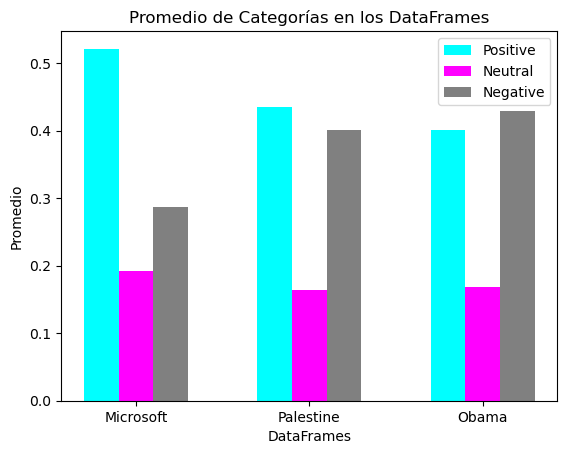

In [10]:
#Creación de la grafica comparativa

# Calcular los promedios de cada categoría para cada DataFrame
positive_means = [dfM['positive'].mean(), dfP['positive'].mean(), dfO['positive'].mean()]
neutral_means = [dfM['neutral'].mean(), dfP['neutral'].mean(), dfO['neutral'].mean()]
negative_means = [dfM['negative'].mean(), dfP['negative'].mean(), dfO['negative'].mean()]


labels = ['Microsoft', 'Palestine', 'Obama']
x = np.arange(len(labels))
width = 0.35  # Ancho de las barras
colors = ['cyan', 'magenta', 'grey']

# Crea el gráfico de barras apiladas con promedios y colores personalizados
fig, ax = plt.subplots()
bar_width = 0.2
bar1 = ax.bar(x - bar_width, positive_means, bar_width, label='Positive', color=colors[0])
bar2 = ax.bar(x, neutral_means, bar_width, label='Neutral', color=colors[1])
bar3 = ax.bar(x + bar_width, negative_means, bar_width, label='Negative', color=colors[2])


ax.set_xlabel('DataFrames')
ax.set_ylabel('Promedio')
ax.set_title('Promedio de Categorías en los DataFrames')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()
plt.show()
